In [1]:
library(tidyverse)
library(modelr)

# forces some modelling functions to warn if they drop missing values
options(na.action = na.warn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let's look at the toy dataset ```sim1``` in the ```modelr``` library.

In [2]:
sim1

x,y
<int>,<dbl>
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823
3,7.356365
3,10.505349
3,10.511601


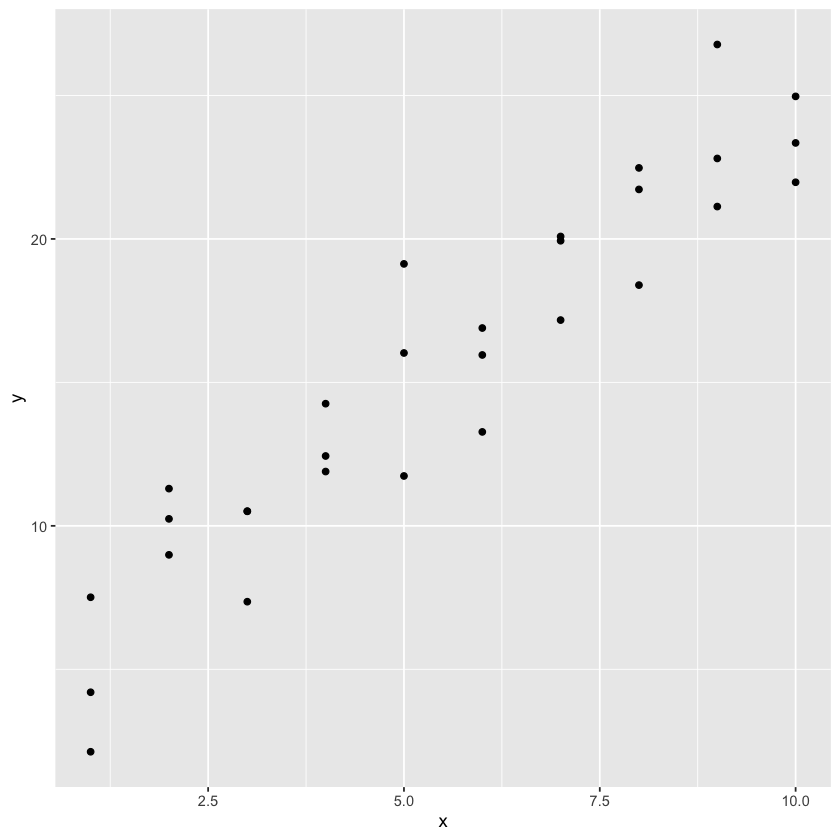

In [3]:
ggplot(sim1, aes(x, y)) + geom_point()

A linear model ```y = a1 + a2*x``` is defined by two parameters: ```a1``` and ```a2```.
- The *parameters* are the placeholders for the numeric choices that give us a particular model

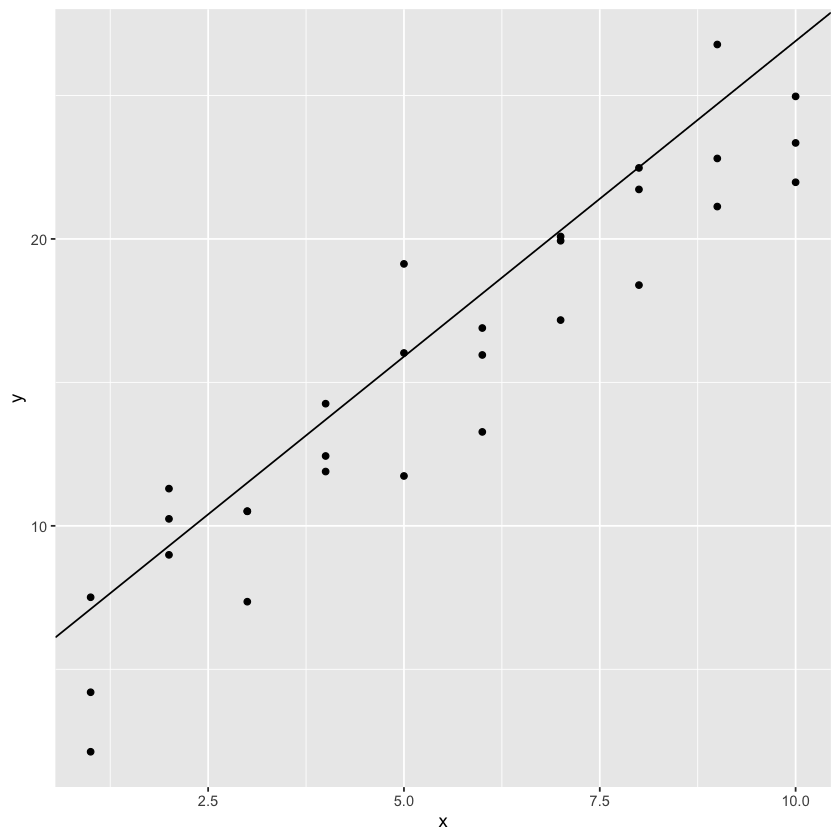

In [7]:
a1 <- 5
a2 <- 2

ggplot(sim1) +
    geom_point(aes(x,y)) +
    geom_abline(aes(slope=a2, intercept=a1))

For a particular model defined by ```a = (a1, a2)``` let's write a function to get the predictions of this model on the ```x``` values.
- For each ```x``` value in ```sim1```, I want the ```y``` value as determined by the line ```y=a1+a2*x```.

In [8]:
# the x-values in the sim1 dataset
sim1$x

[1]  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8  9
[26]  9  9 10 10 10

In [15]:
linear_predictions <- function(a1, a2, data) {
    a1 + a2 * (data$x)
}

linear_predictions(4, 5, sim1)

[1]  9  9  9 14 14 14 19 19 19 24 24 24 29 29 29 34 34 34 39 39 39 44 44 44 49
[26] 49 49 54 54 54

How can we evaluate a linear model?
- How can we get a numeric "score" for how well a model performs?

`geom_smooth()` using method = 'loess'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.9418 -1.2577”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 4.9673”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.4742e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 24.674”
Warning message:
“Removed 8 rows containing missing values (geom_smooth).”


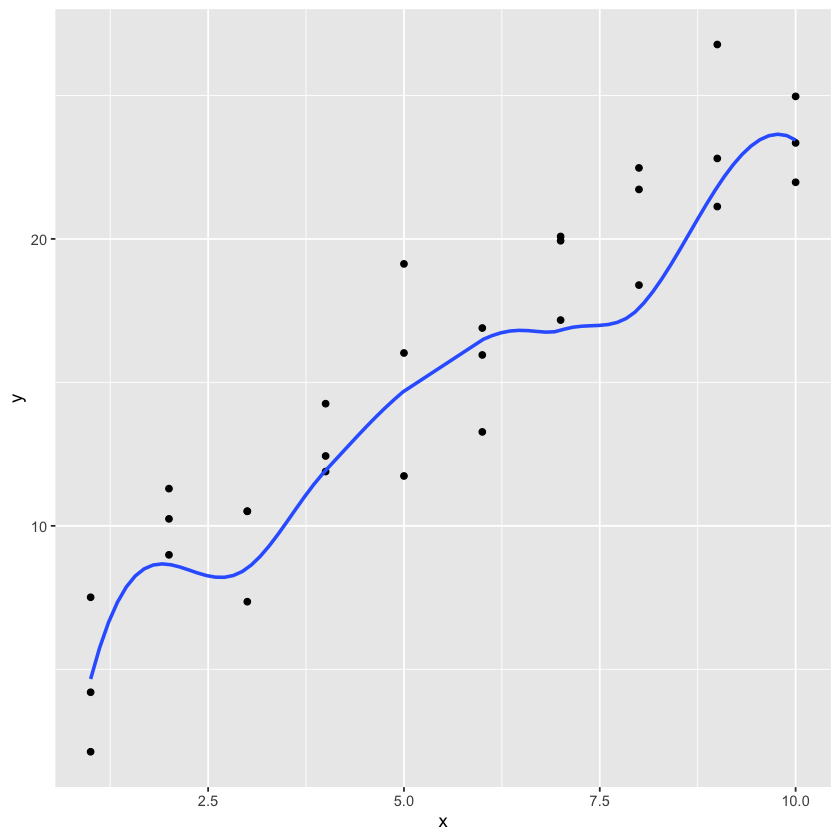

In [16]:
# why or why not not a model like this?
ggplot(sim1) +
    geom_point(aes(x,y)) +
    geom_smooth(aes(x,y), se=F, formula = y ~ poly(x, 2), span=1)